In [3]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization


from ase.build import bulk
from ase.io.trajectory import Trajectory
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from sklearn.model_selection import train_test_split 
from sklearn.kernel_ridge import KernelRidge 
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, SOAP
from ase import Atoms
from ase.io import read

import cWT

/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [4]:
import dftpy
dftpy.__path__

['/opt/homebrew/lib/python3.11/site-packages/dftpy']

In [5]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [6]:
import os
os.chdir('../')
path_file = os.getcwd()

In [7]:
import h5py
file = h5py.File("/Users/valeria/Documents/aiWT/Final_version/wt/wt/organize_data/Data_phases.hdf5", "r")
fileX = file["Descriptor"]
rho0_KE_WT = file["rho0_KE_wt"]
rho0_TE_WT = file["rho0_TE_wt"]
rho0_DEN_WT = file["rho0_DEN_wt"]
rho0_KE_SM = file["rho0_KE_sm"]
rho0_TE_SM = file["rho0_TE_sm"]
rho0_DEN_SM = file["rho0_DEN_sm"]
Rho = file["rho"]


rho0_KE_wt =[]
rho0_TE_wt =[]
rho0_DEN_wt=[]
rho0_KE_sm =[]
rho0_TE_sm =[]
rho0_DEN_sm =[]
rho = []
for i in np.arange(0,280):
    rho0_KE_wt.append(rho0_KE_WT[i][0]) 
    rho0_TE_wt.append(rho0_TE_WT[i][0]) 
    rho0_DEN_wt.append(rho0_DEN_WT[i][0])
    rho0_KE_sm.append(rho0_KE_SM[i][0]) 
    rho0_TE_sm.append(rho0_TE_SM[i][0]) 
    rho0_DEN_sm.append(rho0_DEN_SM[i][0])
    rho.append(Rho[i][0])

In [8]:
file.close()

In [9]:
rho0_Btin_KE_wt = rho0_KE_wt[0:30]; rho0_fcc_KE_wt = rho0_KE_wt[30:60]; rho0_bcc_KE_wt = rho0_KE_wt[60:90]; rho0_cd_KE_wt = rho0_KE_wt[90:120]; rho0_dhcp_KE_wt = rho0_KE_wt[120:150]; rho0_Btin_hd_KE_wt = rho0_KE_wt[150:180]; rho0_rand4_KE_wt = rho0_KE_wt[180:185]; rho0_rand8_KE_wt = rho0_KE_wt[185:190]; rho0_bct5_KE_wt = rho0_KE_wt[190:220]; rho0_hcp_KE_wt = rho0_KE_wt[220:250]; rho0_sh_KE_wt = rho0_KE_wt[250:280]

rho0_Btin_TE_wt = rho0_TE_wt[0:30];rho0_fcc_TE_wt = rho0_TE_wt[30:60];rho0_bcc_TE_wt = rho0_TE_wt[60:90];rho0_cd_TE_wt = rho0_TE_wt[90:120];rho0_dhcp_TE_wt = rho0_TE_wt[120:150];rho0_Btin_hd_TE_wt = rho0_TE_wt[150:180];rho0_rand4_TE_wt = rho0_TE_wt[180:185];rho0_rand8_TE_wt = rho0_TE_wt[185:190];rho0_bct5_TE_wt = rho0_TE_wt[190:220];rho0_hcp_TE_wt = rho0_TE_wt[220:250];rho0_sh_TE_wt = rho0_TE_wt[250:280]

rho0_Btin_DEN_wt = rho0_DEN_wt[0:30];rho0_fcc_DEN_wt = rho0_DEN_wt[30:60];rho0_bcc_DEN_wt = rho0_DEN_wt[60:90];rho0_cd_DEN_wt = rho0_DEN_wt[90:120];rho0_dhcp_DEN_wt = rho0_DEN_wt[120:150];rho0_Btin_hd_DEN_wt = rho0_DEN_wt[150:180];rho0_rand4_DEN_wt = rho0_DEN_wt[180:185];rho0_rand8_DEN_wt = rho0_DEN_wt[185:190];rho0_bct5_DEN_wt = rho0_DEN_wt[190:220];rho0_hcp_DEN_wt = rho0_DEN_wt[220:250];rho0_sh_DEN_wt = rho0_DEN_wt[250:280]

In [10]:
rho0_kin =[rho0_cd_KE_wt]#, rho0_dhcp_KE_wt]
rho0_den =[rho0_cd_DEN_wt]#, rho0_dhcp_DEN_wt]
rho0_ene =[rho0_cd_TE_wt]#, rho0_dhcp_TE_wt]
r = np.linspace(0.9, 3, 20)


In [11]:
rho0_ene2 = np.asarray(rho0_ene[0]).min() * np.ones(10)
rho0_kin2 = np.asarray(rho0_kin[0]).min() * np.ones(10)
rho0_den2 = np.asarray(rho0_den[0]).min() * np.ones(10)

In [14]:
rho0_cd_TE_wt

[0.03418208708112752,
 0.032789625127360535,
 0.03135076818149508,
 0.029961238022075738,
 0.02864678042108233,
 0.027450367385277834,
 0.02631502258095644,
 0.0253255389048869,
 0.02442418377132102,
 0.02363483390179167,
 0.022926728007997183,
 0.022379917985964497,
 0.021911956914108827,
 0.021548279937100175,
 0.021265237750373946,
 0.021030038685248498,
 0.02083592135001262,
 0.020684966008335564,
 0.020569756597121226,
 0.02048329447240175,
 0.020433501353728876,
 0.02040526828239647,
 0.020404834216031113,
 0.020406976689332643,
 0.020394421270023656,
 0.020407172819087344,
 0.02039712579963717,
 0.020376484125519324,
 0.02034734822709772,
 0.020319293543783125]

In [15]:
rho0_kin2

array([0.01762429, 0.01762429, 0.01762429, 0.01762429, 0.01762429,
       0.01762429, 0.01762429, 0.01762429, 0.01762429, 0.01762429])

In [12]:
rho0_den2

array([0.02176769, 0.02176769, 0.02176769, 0.02176769, 0.02176769,
       0.02176769, 0.02176769, 0.02176769, 0.02176769, 0.02176769])

In [16]:
rho0_ene3 = np.hstack((np.asarray(rho0_ene[0]), rho0_ene2))
rho0_kin3 = np.hstack((np.asarray(rho0_kin[0]), rho0_kin2))
rho0_den3 = np.hstack((np.asarray(rho0_den[0]), rho0_den2))

In [17]:
r2 = np.linspace(0.8,1.4, 30)
r3 = np.hstack((r2, np.linspace(1.4,3, 10)))

In [18]:
rho0_mean = 0.03087804
# rho0_mean = 0.02961787

In [32]:
def TF_NL(material, r, rho0_ene, rho0_kin, rho0_den):
    pred_energy = []
    Volume = []
    wt_e_ave = []
    wt_e_den = []
    wt_e_ene = []
    wt_e_kin = []
    vw_e = []
    tf_e = []
    wt_s = []
    rho0_mean = []
    path_rho = None
    for j, d in enumerate(r):
        WT_KE_ave = Functional(type='KEDF',name='WT')
        WT_KE_ene = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_ene[0]).min())
        WT_KE_den = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_den[0]).min())
        WT_KE_kin = Functional(type='KEDF',name='WT', rho0=np.asarray(rho0_kin[0]).min())
        
        vW_KE = Functional(type='KEDF',name='vW')
        TF_KE = Functional(type='KEDF',name='TF')
         
        ions = Ions.from_ase(material)
        cell = ions.get_cell()
        ions.set_cell(cell * d, scale_atoms=True)
        nr = ecut2nr(ecut=25, lattice=ions.cell)
        grid = DirectGrid(lattice=ions.cell, nr=nr)
        PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=20)

        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        print(type(rho_ini.mean()))
        WT_KE_scale = Functional(type='KEDF',name='WT', z=rho_ini.mean()/0.03087804)
        
        evaluator_ave = TotalFunctional(KE=WT_KE_ave,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_ene = TotalFunctional(KE=WT_KE_ene,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_den = TotalFunctional(KE=WT_KE_den,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_kin = TotalFunctional(KE=WT_KE_kin,   XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_vw  = TotalFunctional(KE=vW_KE,       XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        evaluator_sca = TotalFunctional(KE=WT_KE_scale, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        
        optimization_options = {'econv' : 1e-7*ions.nat}
        
        opt_ave = Optimization(EnergyEvaluator=evaluator_ave, optimization_options = optimization_options, optimization_method = 'TN')
        opt_ene = Optimization(EnergyEvaluator=evaluator_ene, optimization_options = optimization_options, optimization_method = 'TN')
        opt_den = Optimization(EnergyEvaluator=evaluator_den, optimization_options = optimization_options, optimization_method = 'TN')
        opt_kin = Optimization(EnergyEvaluator=evaluator_kin, optimization_options = optimization_options, optimization_method = 'TN')
        opt_vw = Optimization(EnergyEvaluator=evaluator_vw, optimization_options = optimization_options, optimization_method = 'TN')
        opt_sca = Optimization(EnergyEvaluator=evaluator_sca, optimization_options = optimization_options, optimization_method = 'TN')
        
        rho_ave = opt_ave.optimize_rho(guess_rho=rho_ini)
        rho_ene = opt_ene.optimize_rho(guess_rho=rho_ini)
        rho_den = opt_den.optimize_rho(guess_rho=rho_ini)
        rho_kin = opt_kin.optimize_rho(guess_rho=rho_ini)
        rho_vw = opt_vw.optimize_rho(guess_rho=rho_ini)
        rho_sca = opt_sca.optimize_rho(guess_rho=rho_ini)
        
        
        
        wt_e_ave.append(WT_KE_ave(rho_ave).energy)
        wt_e_den.append(WT_KE_den(rho_ene).energy)
        wt_e_ene.append(WT_KE_den(rho_den).energy)
        wt_e_kin.append(WT_KE_den(rho_kin).energy)
        vw_e.append(vW_KE(rho_vw).energy)
        tf_e.append(TF_KE(rho_vw).energy)
        wt_s.append(WT_KE_scale(rho_sca).energy)
        rho0_mean.append(rho_ini.mean())
#     return np.asarray(rho0_mean)
    return np.asarray(wt_e_ave), np.asarray(vw_e), np.asarray(tf_e), np.asarray(wt_e_den), np.asarray(wt_e_ene), np.asarray(wt_e_kin), np.asarray(wt_s), np.asarray(rho0_mean)

In [33]:
def rho0(material):
    rho0 = []
    for j, d in enumerate(r):
        ions = Ions.from_ase(material)
        cell = ions.get_cell()
        ions.set_cell(cell * d, scale_atoms=True)
        nr = ecut2nr(ecut=25, lattice=ions.cell)
        grid = DirectGrid(lattice=ions.cell, nr=nr)
        ions.set_charges(4)
        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        z=rho_ini.mean()
        rho0.append(z)
        
    return rho0

In [34]:
dictionary = {
    'Si_Btin': {'file': 'Si_Btin.vasp'}, 
    'Si_fcc': {'file': 'Si_fcc.vasp'},
    'Si_bcc': {'file': 'Si_bcc.vasp'},
    'Si_8cd': {'file': 'Si_cd.vasp'},
    'Si_dhcp': {'file': 'Si_dhcp.vasp'},
    'Si_bct5': {'file': 'Si_bct5.vasp'},
    'Si_sh': {'file': 'Si_sh.vasp'},
    'Si_cbcc': {'file': 'Si_cbcc.vasp'},
    'Si_hcp': {'file': 'Si_hcp.vasp'},
}

In [35]:
def get_ions(phase):
    inputfile = path_file+'/Structures/'+dictionary[phase]['file']
    ions = read(inputfile, format='vasp')
    return ions

In [36]:
path_file

'/Users/valeria/Documents/aiWT/Final_version/wt/wt/Results'

In [37]:
Phases = ['Si_8cd']#, 'Si_dhcp'] 

In [38]:
for i,p in enumerate(Phases):
    ions = get_ions(p)
    print(p,len(ions))

Si_8cd 8


In [39]:
PP_list = PP_list
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

In [40]:
ions = get_ions('Si_8cd')
rho0 = rho0(ions)

In [41]:
Volume = []
Cwt_energy_ke = []
Cwt_kin_ke = []
wt_e_den = {}
wt_e_ene = {}
wt_e_kin = {}
wt_e_ave = {}
vw_e = {}
tf_e = {}
wt_e_sca = {}
rho0_mean = []
# np.asarray(wt_e_ave), np.asarray(vw_e), np.asarray(tf_e), 
# np.asarray(wt_e_den), np.asarray(wt_e_ene), np.asarray(wt_e_kin), np.asarray(wt_s)
for i,p in enumerate(Phases):
    print('Iteration: ', i)
    ions = get_ions(p)
    tf_wt = TF_NL(ions, r3,rho0_ene3, rho0_kin3, rho0_den3)
#     print(np.asarray(tf_wt).shape)
    wt_e_ave[p] =tf_wt[0]
    vw_e[p] =tf_wt[1]
    tf_e[p] =tf_wt[2]
    wt_e_den[p] =tf_wt[3]
    wt_e_ene[p] =tf_wt[4]
    wt_e_kin[p] =tf_wt[5]
    wt_e_sca[p] =tf_wt[6]
    rho0_mean.append(tf_wt[7])

Iteration:  0
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.757753820085E+01     -2.757754E+01   9.443759E+00    1       1       2.364802E-02    
1       -3.078754942265E+01     -3.210011E+00   4.655313E-01    10      2       1.183522E-01    
2       -3.081502150073E+01     -2.747208E-02   2.584880E-02    4       1       1.375580E-01    
3       -3.081748854345E+01     -2.467043E-03   1.632974E-03    5       1       1.742411E-01    
4       -3.081763332717E+01     -1.447837E-04   1.153116E-04    6       1       1.927161E-01    
5       -3.081764195417E+01     -8.626992E-06   9.675269E-06    5       1       2.181880E-01    
6       -3.081764322620E+01     -1.272035E-06   1.992282E-07    7       1       2.530141E-01    
7       -3.081764323798E+01     -1.177977E-08   1.044161E-08    3       1       2.695701E-01    
8       -3.08

18      -3.154981362804E+02     -5.390206E-03   1.457830E+02    2       2       2.649429E-01    
!WARN : pAp small than zero :iter =  3 -11324.944943963335
19      -3.155015295209E+02     -3.393240E-03   1.456397E+02    4       1       2.750511E-01    
20      -3.155064368388E+02     -4.907318E-03   1.453509E+02    2       7       2.906940E-01    
21      -3.155065567730E+02     -1.199342E-04   1.452938E+02    12      3       3.154461E-01    
22      -3.155130554528E+02     -6.498680E-03   1.449028E+02    2       1       3.223009E-01    
23      -3.155133842023E+02     -3.287495E-04   1.449159E+02    2       1       3.278651E-01    
24      -3.155195504454E+02     -6.166243E-03   1.445214E+02    2       6       3.431902E-01    
!WARN : pAp small than zero :iter =  3 -703145052.6674229
25      -3.155205467032E+02     -9.962578E-04   1.445230E+02    4       1       3.543720E-01    
26      -3.155246710769E+02     -4.124374E-03   1.442427E+02    2       4       3.648982E-01    
27      -3

93      -3.155685854944E+02     -3.376371E-03   1.415954E+02    2       8       8.774920E-01    
94      -3.155688551429E+02     -2.696484E-04   1.415703E+02    12      6       9.062312E-01    
95      -3.155695005679E+02     -6.454251E-04   1.415301E+02    2       1       9.117761E-01    
96      -3.155697154355E+02     -2.148676E-04   1.415218E+02    2       1       9.181290E-01    
97      -3.155703027504E+02     -5.873148E-04   1.414841E+02    2       1       9.231210E-01    
!WARN : pAp small than zero :iter =  1 -482804758.5289335
98      -3.155704693664E+02     -1.666160E-04   1.414709E+02    2       1       9.299560E-01    
99      -3.155711650156E+02     -6.956493E-04   1.414222E+02    2       1       9.369471E-01    
100     -3.155714039337E+02     -2.389181E-04   1.414121E+02    2       1       9.428210E-01    
101     -3.155719766115E+02     -5.726778E-04   1.413751E+02    2       1       9.487610E-01    
102     -3.155722595288E+02     -2.829173E-04   1.413616E+02    2    

171     -3.156028939653E+02     -4.633646E-04   1.394691E+02    2       9       1.452668E+00    
172     -3.156030483835E+02     -1.544182E-04   1.394540E+02    12      6       1.481408E+00    
173     -3.156032920053E+02     -2.436218E-04   1.394378E+02    2       1       1.486611E+00    
174     -3.156034153329E+02     -1.233276E-04   1.394312E+02    2       1       1.491788E+00    
175     -3.156036353050E+02     -2.199721E-04   1.394166E+02    2       1       1.496599E+00    
176     -3.156037719422E+02     -1.366372E-04   1.394086E+02    2       1       1.502596E+00    
177     -3.156039804846E+02     -2.085424E-04   1.393947E+02    2       1       1.507540E+00    
178     -3.156041502630E+02     -1.697784E-04   1.393850E+02    3       1       1.513862E+00    
179     -3.156043134453E+02     -1.631824E-04   1.393755E+02    2       1       1.520855E+00    
!WARN : pAp small than zero :iter =  1 -941646320.9983021
180     -3.156044692638E+02     -1.558184E-04   1.393619E+02    2    

6       -4.388138142185E+01     -3.378765E-05   5.474268E-06    6       1       5.496192E-02    
7       -4.388138214708E+01     -7.252356E-07   4.736611E-07    4       1       6.370211E-02    
8       -4.388138220680E+01     -5.972066E-08   4.345238E-08    5       1       6.998205E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.16799969461192302
Chemical potential (eV)  : -4.571504542060847
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.779657423948E+01     -2.779657E+01   9.060456E+00    1       1       4.647017E-03    
1       -3.324778281891E+01     -5.451209E+00   1.684243E+00    14      3       3.210211E-02    
!WARN : pAp small than zero :iter =  11 -91823.58288681901
2       -4.090674241435E+01     -7.658960E+00   3.612600E+01    12      7       6.308293E-02    
!WARN : pAp small than zero :iter =  3 -136492.56916821058
3       -5.368665538965E+01     -1.277991E+01   2.163959E+02    4   

69      -1.972361443160E+02     -7.989161E-05   6.170970E+01    2       1       7.571061E-01    
70      -1.972362191629E+02     -7.484696E-05   6.170678E+01    2       1       7.629690E-01    
71      -1.972362977711E+02     -7.860810E-05   6.170362E+01    2       1       7.682440E-01    
72      -1.972363729778E+02     -7.520677E-05   6.170069E+01    2       1       7.754741E-01    
73      -1.972364511913E+02     -7.821346E-05   6.169755E+01    2       1       7.807689E-01    
74      -1.972365267079E+02     -7.551662E-05   6.169460E+01    2       1       7.861850E-01    
75      -1.972366045470E+02     -7.783905E-05   6.169148E+01    2       1       7.924671E-01    
76      -1.972366803341E+02     -7.578716E-05   6.168851E+01    2       1       7.974041E-01    
77      -1.972367578952E+02     -7.756111E-05   6.168542E+01    2       1       8.024261E-01    
78      -1.972368338555E+02     -7.596027E-05   6.168243E+01    2       1       8.085151E-01    
79      -1.972369112033E+02   

6       -3.153726451965E+01     -7.495336E-07   1.049199E-06    4       1       8.090687E-02    
7       -3.153726473163E+01     -2.119849E-07   8.295133E-08    6       1       9.287596E-02    
8       -3.153726474223E+01     -1.059846E-08   3.098771E-09    8       1       1.075733E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.44504925817502244
Chemical potential (eV)  : 12.110407164058815
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -4.037320887693E+01     -4.037321E+01   8.723850E+00    1       1       2.107859E-03    
!WARN : pAp small than zero :iter =  9 -5806.272488346274
1       -4.254947892807E+01     -2.176270E+00   9.736389E+00    10      2       1.794386E-02    
2       -4.350183905739E+01     -9.523601E-01   3.651579E-01    5       1       2.527785E-02    
3       -4.353225885494E+01     -3.041980E-02   2.461596E-02    5       1       3.235269E-02    
4       -4.353560375252E+01     

54      -2.089697857257E+03     -7.966143E-05   3.893872E+02    2       1       5.140209E-01    
55      -2.089697935903E+03     -7.864544E-05   3.893776E+02    2       1       5.198071E-01    
56      -2.089698015755E+03     -7.985251E-05   3.893681E+02    2       1       5.258429E-01    
57      -2.089698094378E+03     -7.862262E-05   3.893586E+02    2       1       5.314341E-01    
58      -2.089698174225E+03     -7.984655E-05   3.893490E+02    2       1       5.373549E-01    
59      -2.089698253003E+03     -7.877865E-05   3.893394E+02    2       1       5.438437E-01    
60      -2.089698332584E+03     -7.958034E-05   3.893299E+02    2       1       5.492499E-01    
61      -2.089698411355E+03     -7.877117E-05   3.893204E+02    2       1       5.547450E-01    
62      -2.089698491085E+03     -7.973030E-05   3.893108E+02    2       1       5.611780E-01    
63      -2.089698569731E+03     -7.864577E-05   3.893014E+02    2       1       5.666618E-01    
64      -2.089698649485E+03   

139     -2.090070359228E+03     -1.385384E-05   3.490979E+02    2       1       1.134668E+00    
140     -2.090070373082E+03     -1.385364E-05   3.490962E+02    2       1       1.141456E+00    
141     -2.090070386935E+03     -1.385347E-05   3.490945E+02    2       1       1.147850E+00    
142     -2.090070400789E+03     -1.385328E-05   3.490928E+02    2       1       1.153631E+00    
143     -2.090070414642E+03     -1.385312E-05   3.490911E+02    2       1       1.159844E+00    
144     -2.090070428495E+03     -1.385292E-05   3.490894E+02    2       1       1.165583E+00    
145     -2.090070442348E+03     -1.385273E-05   3.490877E+02    2       1       1.171431E+00    
146     -2.090070456200E+03     -1.385258E-05   3.490859E+02    2       1       1.177794E+00    
147     -2.090070470052E+03     -1.385238E-05   3.490842E+02    2       1       1.183454E+00    
148     -2.090070483905E+03     -1.385219E-05   3.490825E+02    2       1       1.189442E+00    
149     -2.090070497757E+03   

Chemical potential (eV)  : 10.99093666839756
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.804422857688E+01     -2.804423E+01   8.431827E+00    1       1       3.279924E-03    
1       -3.161601566159E+01     -3.571787E+00   4.150299E-01    12      2       2.701998E-02    
2       -3.165752940273E+01     -4.151374E-02   2.935189E-02    5       1       3.767514E-02    
3       -3.165995627493E+01     -2.426872E-03   2.679507E-03    4       1       4.659200E-02    
4       -3.166034406786E+01     -3.877929E-04   2.612834E-04    6       1       5.883288E-02    
5       -3.166035793622E+01     -1.386836E-05   1.998093E-05    4       1       6.980109E-02    
6       -3.166036091097E+01     -2.974749E-06   1.487289E-06    6       1       8.146787E-02    
7       -3.166036103272E+01     -1.217495E-07   6.086430E-08    7       1       9.650803E-02    
8       -3.166036103678E+01     -4.059839E-09   4.820873E-09    5       1       1.

2       -3.182157899528E+01     -5.274351E-02   4.059535E-02    5       1       3.572297E-02    
3       -3.182485535209E+01     -3.276357E-03   3.446912E-03    4       1       4.521489E-02    
4       -3.182539178132E+01     -5.364292E-04   2.443381E-04    6       1       5.690479E-02    
5       -3.182540422615E+01     -1.244482E-05   2.003502E-05    3       1       6.403470E-02    
6       -3.182540698948E+01     -2.763338E-06   1.449243E-06    6       1       7.605600E-02    
7       -3.182540717072E+01     -1.812331E-07   8.918940E-08    8       1       9.122396E-02    
8       -3.182540717356E+01     -2.841141E-09   7.324143E-09    2       1       9.679389E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3659932162675952
Chemical potential (eV)  : 9.959182690157258
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.937740710511E+01     -3.937741E+01   8.177965E+00    1       1       2.174854E-03

5       -4.248867078347E+01     -3.959829E-04   1.397282E-04    7       1       4.946613E-02    
6       -4.248868204753E+01     -1.126405E-05   1.142010E-05    4       1       5.634308E-02    
7       -4.248868328054E+01     -1.233010E-06   7.426119E-07    6       1       6.462216E-02    
8       -4.248868334430E+01     -6.376521E-08   2.654746E-08    7       1       7.358217E-02    
9       -4.248868334691E+01     -2.610186E-09   2.248705E-09    5       1       8.090329E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.21846668754936818
Chemical potential (eV)  : -5.944781368370682
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.809508523863E+01     -2.809509E+01   7.953413E+00    1       1       3.051043E-03    
1       -3.238746728076E+01     -4.292382E+00   4.495657E-01    13      2       2.808928E-02    
2       -3.243590356959E+01     -4.843629E-02   3.293786E-02    5       1       3.987813E

6       -3.230104852946E+01     -1.009890E-06   2.408111E-07    9       1       1.326241E-01    
7       -3.230104854105E+01     -1.159468E-08   1.162119E-08    5       1       1.474700E-01    
8       -3.230104854233E+01     -1.276938E-09   1.168390E-09    7       1       1.656802E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.28741132703065486
Chemical potential (eV)  : 7.820860567606805
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.800139567137E+01     -2.800140E+01   7.567683E+00    1       1       2.921510E-02    
1       -3.181431720775E+01     -3.812922E+00   4.106029E-01    14      2       1.063371E-01    
2       -3.191014719759E+01     -9.582999E-02   3.137149E-02    7       1       1.528730E-01    
3       -3.191241977406E+01     -2.272576E-03   1.955544E-03    5       1       2.029569

8       -3.195673834567E+01     -9.775601E-09   1.662815E-09    9       1       3.361831E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2464119304718558
Chemical potential (eV)  : 6.70521016107921
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.791280881897E+01     -2.791281E+01   7.400520E+00    1       1       3.157854E-03    
1       -3.182470297098E+01     -3.911894E+00   3.666646E-01    15      2       4.041100E-02    
2       -3.192893185565E+01     -1.042289E-01   2.458365E-02    7       1       5.772209E-02    
3       -3.193067533873E+01     -1.743483E-03   2.245557E-03    4       1       7.042384E-02    
4       -3.193094082214E+01     -2.654834E-04   1.169848E-04    6       1       8.544683E-02    
5       -3.193095237546E+01     -1.155332E-05   1.157750E-05    6       1       1.007638E-01    
6       -3.193095358043E+01     -1.204965E-06   7.315038E-07    7       1       1.188118E-01 

1       -3.175415331507E+01     -3.952461E+00   4.042682E-01    15      2       3.909516E-02    
2       -3.188282875983E+01     -1.286754E-01   2.492443E-02    7       1       5.730796E-02    
3       -3.188469258029E+01     -1.863820E-03   2.355997E-03    4       1       6.903815E-02    
4       -3.188497265404E+01     -2.800737E-04   1.118654E-04    6       1       8.451700E-02    
5       -3.188498555550E+01     -1.290147E-05   7.147499E-06    7       1       1.020670E-01    
6       -3.188498628677E+01     -7.312607E-07   6.158167E-07    6       1       1.172402E-01    
7       -3.188498638088E+01     -9.411296E-08   3.926853E-08    8       1       1.366570E-01    
8       -3.188498638286E+01     -1.982464E-09   3.038178E-09    3       1       1.456971E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22285300968532634
Chemical potential (eV)  : 6.064139273239467
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)    

7       -3.191253180017E+01     -4.872778E-08   1.820221E-08    8       1       1.782000E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.19871479699442912
Chemical potential (eV)  : 5.407305049769183
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.634665471499E+01     -3.634665E+01   7.111207E+00    1       1       2.578020E-03    
!WARN : pAp small than zero :iter =  9 -280625.0911506539
1       -3.903211808029E+01     -2.685463E+00   1.810111E+01    10      2       2.484584E-02    
2       -4.062613726279E+01     -1.594019E+00   1.255801E+00    5       1       3.604579E-02    
3       -4.082141222044E+01     -1.952750E-01   8.822990E-02    8       1       5.260301E-02    
4       -4.083015279705E+01     -8.740577E-03   6.235741E-03    7       1       6.676102E-02    
5       -4.083110437235E+01     -9.515753E-04   2.923687E-04    9       1       8.508611E-02    
6       -4.083111722326E+01     -

3       -3.180242767199E+01     -1.855015E-03   2.072340E-03    5       1       9.704185E-02    
4       -3.180265789902E+01     -2.302270E-04   1.157452E-04    7       1       1.175809E-01    
5       -3.180267171390E+01     -1.381488E-05   8.840562E-06    8       1       1.423090E-01    
6       -3.180267237208E+01     -6.581866E-07   7.937112E-07    5       1       1.584499E-01    
7       -3.180267250683E+01     -1.347497E-07   5.068042E-08    8       1       1.829808E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.17991189750947664
Chemical potential (eV)  : 4.895652093506764
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.736404744736E+01     -2.736405E+01   6.874183E+00    1       1       3.525591E-02    
1       -3.185193638141E+01     -4.487889E+00   3.430280E-01    19      2       1.722350

7       -3.203965893149E+01     -5.502763E-08   4.119590E-08    6       1       3.948512E-01    
8       -3.203965893886E+01     -7.366552E-09   3.302806E-09    9       1       4.250152E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.1331939170568669
Chemical potential (eV)  : 3.624391093131958
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.719172352177E+01     -2.719172E+01   6.771636E+00    1       1       3.767967E-03    
1       -3.158852904146E+01     -4.396806E+00   3.252097E-01    19      2       5.972385E-02    
2       -3.175102240718E+01     -1.624934E-01   2.872881E-02    7       1       8.085489E-02    
3       -3.175291031183E+01     -1.887905E-03   1.743801E-03    5       1       9.848690E-02    
4       -3.175308333301E+01     -1.730212E-04   1.711569E-04    6       1       1.177080E-01    
5       -3.175309637316E+01     -1.304015E-05   1.418018E-05    7       1       1.379728E-01

0       -2.700954324987E+01     -2.700954E+01   6.677309E+00    1       1       6.313801E-03    
1       -3.137017138052E+01     -4.360628E+00   7.197752E-01    18      2       1.102006E-01    
2       -3.164851396302E+01     -2.783426E-01   5.470476E-02    8       1       1.550307E-01    
3       -3.165178448588E+01     -3.270523E-03   4.132502E-03    5       1       1.855109E-01    
4       -3.165228632583E+01     -5.018400E-04   2.596692E-04    7       1       2.266970E-01    
5       -3.165231105436E+01     -2.472853E-05   1.477524E-05    8       1       2.723677E-01    
6       -3.165231247593E+01     -1.421569E-06   1.291678E-06    6       1       3.085167E-01    
7       -3.165231269495E+01     -2.190221E-07   9.936014E-08    8       1       3.557439E-01    
8       -3.165231270209E+01     -7.139491E-09   9.647453E-09    5       1       3.876717E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.12254841094667039
Chemical potential (eV)  : 3.3347121169

3       -3.166153347201E+01     -3.565753E-03   4.066914E-03    6       1       1.955438E-01    
4       -3.166194917679E+01     -4.157048E-04   3.614080E-04    7       1       2.364559E-01    
5       -3.166197245317E+01     -2.327638E-05   3.366131E-05    5       1       2.690849E-01    
6       -3.166197952120E+01     -7.068030E-06   2.095248E-06    9       2       3.245671E-01    
7       -3.166197958788E+01     -6.668203E-08   1.750200E-07    2       1       3.409407E-01    
8       -3.166197961060E+01     -2.271947E-08   1.097415E-08    7       2       3.868039E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.10478428149648406
Chemical potential (eV)  : 2.8513255330867895
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.395322841354E+01     -3.395323E+01   6.589396E+00    1       1       4.300117E-03    
!WARN : pAp small than zero :iter =  8 -26691.141756051424
1       -3.786571923040E+01    

6       -3.914932093731E+01     -4.378953E-05   3.492347E-05    7       1       1.731319E-01    
7       -3.914932614183E+01     -5.204519E-06   2.100509E-06    10      1       2.093639E-01    
8       -3.914932633085E+01     -1.890218E-07   1.678059E-07    5       1       2.299027E-01    
9       -3.914932634469E+01     -1.383665E-08   1.538717E-08    5       1       2.503607E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.28525270046082923
Chemical potential (eV)  : -7.762121346732824
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.662192312079E+01     -2.662192E+01   6.505951E+00    1       1       6.297112E-03    
1       -3.099499729339E+01     -4.373074E+00   8.864142E-01    18      2       1.075251E-01    
2       -3.134846287728E+01     -3.534656E-01   7.645954E-02    10      1       1.633441E-01    
3       -3.135459614512E+01     -6.133268E-03   5.804779E-03    6       1       2.001939E

7       -3.126504635398E+01     -6.046309E-07   8.644120E-08    9       1       3.247960E-01    
8       -3.126504636862E+01     -1.463702E-08   8.003643E-09    7       1       3.656027E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.08158109542118601
Chemical potential (eV)  : 2.2199346797966313
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.621187947082E+01     -2.621188E+01   6.346874E+00    1       1       2.677917E-02    
1       -2.917854365862E+01     -2.966664E+00   2.523101E+01    13      5       1.983790E-01    
2       -3.199112000254E+01     -2.812576E+00   1.350579E+00    8       1       2.722847E-01    
3       -3.211983743428E+01     -1.287174E-01   1.308404E-01    8       1       3.208911E-01    
4       -3.212781070294E+01     -7.973269E-03   1.140687E-02    4       1       3.38155

8       -3.216412403567E+01     -6.786825E-07   2.350038E-07    8       1       4.454319E-01    
9       -3.216412407915E+01     -4.348593E-08   1.551546E-08    10      1       4.834230E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.0339630262484298
Chemical potential (eV)  : 0.9241810178017404
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.600107447264E+01     -2.600107E+01   6.269801E+00    1       1       4.810095E-03    
1       -3.113186911526E+01     -5.130795E+00   4.242470E+00    12      2       5.262995E-02    
2       -3.135434457402E+01     -2.224755E-01   3.880746E-01    3       1       6.811500E-02    
3       -3.139201650213E+01     -3.767193E-02   1.865904E-02    5       1       8.958697E-02    
4       -3.139684155943E+01     -4.825057E-03   1.921897E-03    13      1       1.366880E-01    
5       -3.139712790079E+01     -2.863414E-04   1.830613E-04    8       1       1.671569E-0

4       -3.133747484780E+01     -8.320095E-03   3.198475E-03    12      2       1.694899E-01    
5       -3.133775287495E+01     -2.780271E-04   2.337481E-04    4       1       1.871476E-01    
6       -3.133779808665E+01     -4.521171E-05   1.142450E-05    8       1       2.184577E-01    
7       -3.133779956799E+01     -1.481335E-06   7.509966E-07    10      1       2.586210E-01    
8       -3.133779961488E+01     -4.688763E-08   7.039940E-08    4       1       2.760267E-01    
9       -3.133779962369E+01     -8.819452E-09   6.738895E-09    6       1       3.013389E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.03658617057525848
Chemical potential (eV)  : 0.9955604106767046
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.578755241097E+01     -2.578755E+01   6.194282E+00    1       1       5.007744E-03    
1       -3.100758738018E+01     -5.220035E+00   4.484950E+00    13      2       5.683994E-

0       -2.557203286119E+01     -2.557203E+01   6.120611E+00    1       1       4.567146E-03    
!WARN : pAp small than zero :iter =  15 -264683.94311503705
1       -3.025380796530E+01     -4.681775E+00   2.157015E+00    16      3       6.978202E-02    
2       -3.119389203782E+01     -9.400841E-01   1.512343E-01    8       1       9.982419E-02    
3       -3.123238289982E+01     -3.849086E-02   9.556114E-03    12      1       1.449342E-01    
4       -3.123346869963E+01     -1.085800E-03   7.461743E-04    7       1       1.731241E-01    
5       -3.123358645713E+01     -1.177575E-04   5.965154E-05    11      1       2.137642E-01    
6       -3.123359407191E+01     -7.614779E-06   4.952650E-06    9       1       2.471433E-01    
7       -3.123359437575E+01     -3.038483E-07   3.004624E-07    6       1       2.715662E-01    
8       -3.123359442196E+01     -4.620033E-08   2.619760E-08    10      1       3.090942E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.):

9       -3.117302947544E+01     -3.751758E-09   1.803538E-09    7       1       2.734160E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.015291190345012256
Chemical potential (eV)  : 0.4160944832502058
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.535514405429E+01     -2.535514E+01   6.049057E+00    1       1       4.613876E-03    
!WARN : pAp small than zero :iter =  12 -571530.6077406202
1       -2.995478227401E+01     -4.599638E+00   3.533317E+00    13      3       6.093097E-02    
2       -3.120610132412E+01     -1.251319E+00   2.743958E-01    9       1       9.467292E-02    
3       -3.124469247104E+01     -3.859115E-02   2.399003E-02    8       1       1.259310E-01    
4       -3.124812613967E+01     -3.433669E-03   2.070241E-03    8       1       1.562569E-01    
5       -3.124855602187E+01     -4.298822E-04   1.586044E-04    11      1       1.973970E-01    
6       -3.124857390871E+01   

4       -3.119016471972E+01     -1.380710E-03   1.381410E-03    5       1       2.039659E-01    
5       -3.119031198148E+01     -1.472618E-04   9.906669E-05    7       1       2.414870E-01    
6       -3.119032421805E+01     -1.223657E-05   6.317799E-06    10      1       2.889018E-01    
7       -3.119032478501E+01     -5.669586E-07   2.418122E-07    8       1       3.273900E-01    
8       -3.119032480348E+01     -1.846916E-08   1.722486E-08    6       1       3.571231E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.004196645048522678
Chemical potential (eV)  : 0.11419652842259999
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.054058532996E+01     -3.054059E+01   5.979616E+00    1       1       3.759146E-03    
!WARN : pAp small than zero :iter =  7 -390801.8030207729
1       -3.600243513478E+01     -5.461850E+00   1.848654E+01    8       2       3.418326E-02    
2       -3.749883241779E+01   

Chemical potential (eV)  : -0.1398330275987606
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.015146759548E+01     -3.015147E+01   5.912122E+00    1       1       3.558159E-03    
!WARN : pAp small than zero :iter =  7 -4943231.939884054
1       -3.568476267365E+01     -5.533295E+00   1.961765E+01    8       2       3.319502E-02    
2       -3.728865013793E+01     -1.603887E+00   1.133318E+00    5       1       5.147409E-02    
3       -3.748508731422E+01     -1.964372E-01   7.347376E-02    9       1       7.972908E-02    
4       -3.749750621769E+01     -1.241890E-02   7.646402E-03    15      2       1.262031E-01    
5       -3.749810026415E+01     -5.940465E-04   6.484487E-04    4       1       1.413810E-01    
6       -3.749816412869E+01     -6.386454E-05   5.777369E-05    6       1       1.616080E-01    
7       -3.749817050669E+01     -6.377996E-06   3.983024E-06    7       1       1.849189E-01    
8       -3.74981708758

5       -3.733619580845E+01     -8.143323E-04   6.438042E-04    6       1       1.355751E-01    
6       -3.733630728303E+01     -1.114746E-04   4.245431E-05    10      1       1.663051E-01    
7       -3.733631200496E+01     -4.721925E-06   4.140111E-06    6       1       1.859581E-01    
8       -3.733631249428E+01     -4.893184E-07   3.186545E-07    8       1       2.108920E-01    
9       -3.733631254979E+01     -5.551268E-08   2.969397E-08    11      1       2.438211E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.3071745790631437
Chemical potential (eV)  : -8.35864604775972
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.470140393684E+01     -2.470140E+01   5.846165E+00    1       1       6.034851E-03    
1       -2.836587662598E+01     -3.664473E+00   1.963340E+01    11      4       7.082701E-02    
2       -3.044731736801E+01     -2.081441E+00   9.851024E-01    8       1       1.105511E-0

1       -2.827062416927E+01     -3.786762E+00   2.029741E+01    10      4       6.664419E-02    
2       -3.036260775873E+01     -2.091984E+00   9.338707E-01    8       1       1.054392E-01    
3       -3.044085498767E+01     -7.824723E-02   7.875275E-02    4       1       1.282501E-01    
4       -3.045930410869E+01     -1.844912E-02   4.454790E-03    10      2       1.791430E-01    
5       -3.045982457473E+01     -5.204660E-04   2.777292E-04    8       1       2.177951E-01    
6       -3.045985266517E+01     -2.809044E-05   2.143716E-05    7       1       2.515001E-01    
7       -3.045985764108E+01     -4.975913E-06   1.841321E-06    14      2       3.190880E-01    
8       -3.045985781143E+01     -1.703443E-07   1.377222E-07    5       1       3.462121E-01    
9       -3.045985782659E+01     -1.516123E-08   8.371384E-09    10      1       3.929801E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.011856191339909056
Chemical potential (eV)  : -0.3226233

7       -3.037577791366E+01     -2.145157E-06   7.788482E-07    7       1       4.169090E-01    
8       -3.037577798655E+01     -7.289574E-08   3.716611E-08    8       1       4.637911E-01    
9       -3.037577799043E+01     -3.875083E-09   1.597174E-09    6       1       5.017271E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.01937485833113359
Chemical potential (eV)  : -0.5272167492159039
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.405130602695E+01     -2.405131E+01   5.653292E+00    1       1       3.573084E-02    
1       -2.809193311058E+01     -4.040627E+00   4.416316E+01    6       2       1.135418E-01    
2       -3.266632183844E+01     -4.574389E+00   1.915199E+00    9       2       2.373619E-01    
3       -3.277501633949E+01     -1.086945E-01   1.712376E-01    3       1       2.791

0       -2.383680288853E+01     -2.383680E+01   5.589656E+00    1       1       5.188704E-02    
!WARN : pAp small than zero :iter =  5 -75485.54849550145
1       -3.203780266698E+01     -8.201000E+00   1.264585E+01    6       4       1.796379E-01    
2       -3.279305666926E+01     -7.552540E-01   1.245004E+00    3       1       2.216070E-01    
3       -3.286602759462E+01     -7.297093E-02   9.683030E-02    5       1       2.889378E-01    
4       -3.289536699075E+01     -2.933940E-02   5.945695E-03    10      2       3.607140E-01    
5       -3.289659113624E+01     -1.224145E-03   5.604160E-04    9       1       4.118299E-01    
6       -3.289674122795E+01     -1.500917E-04   5.187188E-05    13      1       4.870949E-01    
7       -3.289674924793E+01     -8.019977E-06   4.221377E-06    7       1       5.301850E-01    
8       -3.289675034943E+01     -1.101504E-06   2.874978E-07    15      1       6.140561E-01    
9       -3.289675040521E+01     -5.577787E-08   2.331364E-08    9    

4       -3.289536699075E+01     -2.933940E-02   5.945695E-03    10      2       3.437519E-01    
5       -3.289659113624E+01     -1.224145E-03   5.604160E-04    9       1       3.957710E-01    
6       -3.289674122795E+01     -1.500917E-04   5.187188E-05    13      1       4.710031E-01    
7       -3.289674924793E+01     -8.019977E-06   4.221377E-06    7       1       5.115168E-01    
8       -3.289675034943E+01     -1.101504E-06   2.874978E-07    15      1       5.925169E-01    
9       -3.289675040521E+01     -5.577787E-08   2.331364E-08    9       1       6.434779E-01    
10      -3.289675041047E+01     -5.257064E-09   2.007120E-09    14      2       7.215848E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.08149540758858892
Chemical potential (eV)  : -2.217602995106241
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.383680288853E+01     -2.383680E+01   5.589656E+00    1       1       6.014109E

9       -3.391288914116E+01     -5.562904E-08   2.277134E-08    15      1       8.823950E-01    
10      -3.391288914555E+01     -4.387623E-09   2.135807E-09    10      1       9.568951E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.15562486575856396
Chemical potential (eV)  : -4.234768297146616
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.206855471828E+01     -2.206855E+01   5.061770E+00    1       1       9.050131E-03    
!WARN : pAp small than zero :iter =  4 -131912.98473228683
1       -2.973136701016E+01     -7.662812E+00   7.260288E+00    5       2       5.965209E-02    
2       -3.019584088302E+01     -4.644739E-01   6.482555E-01    3       1       8.653402E-02    
3       -3.040895435916E+01     -2.131135E-01   8.685936E-02    15      2       2.064209E-01    
4       -3.041340030769E+01     -4.445949E-03   7.271120E-03    4       1       2.413280E-01    
5       -3.041431325465E+01   

#### Density Optimization Converged ####
Chemical potential (a.u.): -0.22040354451097352
Chemical potential (eV)  : -5.997485930826908
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.046773739911E+01     -2.046774E+01   4.580460E+00    1       1       1.034212E-02    
!WARN : pAp small than zero :iter =  2 -124718.03056453394
1       -2.887646874023E+01     -8.408731E+00   1.377473E+01    3       4       7.581306E-02    
2       -2.990309018612E+01     -1.026621E+00   1.149146E+00    3       1       1.148012E-01    
3       -3.009083800290E+01     -1.877478E-01   1.222666E-01    15      2       2.695930E-01    
4       -3.009997938049E+01     -9.141378E-03   4.343247E-03    5       1       3.234239E-01    
5       -3.010223749063E+01     -2.258110E-03   7.573157E-04    13      2       4.545939E-01    
6       -3.010246661640E+01     -2.291258E-04   2.079407E-04    14      2       5.909359E-01    
7       -3.010250267526E+01   

Chemical potential (eV)  : -7.491640280257377
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.904238367227E+01     -1.904238E+01   4.144040E+00    1       1       1.241803E-02    
!WARN : pAp small than zero :iter =  1 -4324.624663861869
1       -2.528594558690E+01     -6.243562E+00   4.396072E+01    2       3       7.733393E-02    
2       -2.949493139935E+01     -4.208986E+00   4.103028E+00    8       1       1.944180E-01    
3       -2.979099540808E+01     -2.960640E-01   3.874880E-01    4       1       2.634060E-01    
4       -2.987500035613E+01     -8.400495E-02   4.309248E-02    12      2       4.248080E-01    
5       -2.987876692169E+01     -3.766566E-03   6.843382E-03    12      1       5.784230E-01    
6       -2.988206592230E+01     -3.299001E-03   2.580246E-03    12      2       7.406750E-01    
7       -2.988251444303E+01     -4.485207E-04   2.211832E-04    8       1       8.433609E-01    
8       -2.988258148975

6       -3.644546219199E+01     -6.777378E-04   2.392305E-04    12      1       1.076946E+00    
7       -3.644552317119E+01     -6.097920E-05   2.208751E-05    12      1       1.297514E+00    
8       -3.644553022996E+01     -7.058769E-06   2.076334E-06    14      1       1.538644E+00    
9       -3.644553057911E+01     -3.491556E-07   2.054630E-07    9       1       1.695120E+00    
10      -3.644553062583E+01     -4.671370E-08   2.014441E-08    12      1       1.903996E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.31872490663327585
Chemical potential (eV)  : -8.672946469978477
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.777918776988E+01     -1.777919E+01   3.751848E+00    1       1       1.832604E-02    
!WARN : pAp small than zero :iter =  1 -109840.48660822734
1       -2.482288346873E+01     -7.043696E+00   6.442104E+01    2       2       9.471321E-02    
2       -2.727248099805E+01   

<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.665910719819E+01     -1.665911E+01   3.403085E+00    1       1       1.037700E-01    
!WARN: Change to steepest decent
1       -2.744715167454E+01     -1.078804E+01   1.627982E+02    1       3       3.068681E-01    
2       -3.365024130809E+01     -6.203090E+00   8.073024E+00    2       1       4.223640E-01    
3       -3.684027493072E+01     -3.190034E+00   4.540552E-01    11      2       8.333678E-01    
4       -3.691365408379E+01     -7.337915E-02   3.993506E-02    9       1       1.154253E+00    
5       -3.691880787033E+01     -5.153787E-03   3.197305E-03    8       1       1.424597E+00    
6       -3.692004552855E+01     -1.237658E-03   2.252151E-04    12      1       1.811250E+00    
7       -3.692008738072E+01     -4.185217E-05   1.937430E-05    11      1       2.171882E+00    
8       -3.692009055217E+01     -3.171445E-06   2.312146E-06    12    

#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1324022950207584
Chemical potential (eV)  : -3.602849960322014
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.566304191939E+01     -1.566304E+01   3.093824E+00    1       1       8.316112E-02    
!WARN: Change to steepest decent
1       -2.770307352065E+01     -1.204003E+01   1.649737E+02    1       3       3.030932E-01    
2       -3.396272333749E+01     -6.259650E+00   8.313416E+00    2       1       4.000530E-01    
3       -3.718017849396E+01     -3.217455E+00   5.575027E-01    11      2       7.275901E-01    
4       -3.725706478763E+01     -7.688629E-02   4.788360E-02    9       1       9.666069E-01    
5       -3.726282436444E+01     -5.759577E-03   3.706884E-03    8       1       1.197456E+00    
6       -3.726424439330E+01     -1.420029E-03   2.3435

9       -2.798468670741E+01     -2.067905E-06   4.383441E-05    14      1       2.659671E+00    
10      -2.798468798580E+01     -1.278385E-06   3.759526E-05    12      1       2.961109E+00    
11      -2.798470349842E+01     -1.551262E-05   2.425081E-05    14      3       3.357773E+00    
12      -2.798471722884E+01     -1.373042E-05   8.161641E-06    14      2       3.787800E+00    
13      -2.798471873395E+01     -1.505103E-06   5.416995E-07    9       1       4.044847E+00    
14      -2.798471897604E+01     -2.420926E-07   4.964334E-08    15      1       4.466367E+00    
15      -2.798471899461E+01     -1.856935E-08   1.850990E-08    14      2       4.922545E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13564677336569547
Chemical potential (eV)  : -3.6911367130137966
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
<class 'numpy.ndarray'>
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(

4       -2.783368939426E+01     -5.966967E-02   6.553381E-02    4       1       1.276723E+00    
5       -2.785064001041E+01     -1.695062E-02   6.536801E-03    13      2       1.820828E+00    
6       -2.785087294734E+01     -2.329369E-04   6.279832E-03    12      1       2.290275E+00    
7       -2.785101814205E+01     -1.451947E-04   3.833153E-03    12      1       2.782093E+00    
8       -2.785479494056E+01     -3.776799E-03   1.650968E-03    15      4       3.478538E+00    
9       -2.785539368615E+01     -5.987456E-04   3.521887E-04    13      2       4.014186E+00    
10      -2.785555950567E+01     -1.658195E-04   5.866326E-05    24      1       4.876516E+00    
11      -2.785558800486E+01     -2.849919E-05   1.163788E-05    16      2       5.539419E+00    
12      -2.785558903181E+01     -1.026953E-06   1.113199E-06    7       1       5.828683E+00    
13      -2.785558930884E+01     -2.770348E-07   9.005397E-08    11      1       6.247401E+00    
14      -2.785558934708E+01   

4       -3.491257402126E+01     -7.499709E-02   4.534257E-02    10      1       1.086993E+00    
5       -3.492190700990E+01     -9.332989E-03   4.370873E-03    14      1       1.487418E+00    
6       -3.492260969769E+01     -7.026878E-04   3.249738E-04    8       1       1.738926E+00    
7       -3.492264407556E+01     -3.437787E-05   2.218511E-05    8       1       1.995857E+00    
8       -3.492265198293E+01     -7.907378E-06   2.000290E-06    12      1       2.327474E+00    
9       -3.492265229637E+01     -3.134402E-07   1.033153E-07    11      1       2.633586E+00    
10      -3.492265232633E+01     -2.996059E-08   7.453564E-09    14      1       3.030993E+00    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.3313458189890842
Chemical potential (eV)  : -9.016378988072084
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.397633262513E+01     -1.397633E+01   2.578599E+00    1       1       4.966283E-

!WARN: Change to steepest decent
1       -2.819387289846E+01     -1.395849E+01   1.034868E+02    1       4       2.165370E-01    
2       -3.244498193709E+01     -4.251109E+00   6.395994E+00    2       1       3.253717E-01    
3       -3.482841092509E+01     -2.383429E+00   6.012681E-01    15      2       9.730349E-01    
4       -3.490678913586E+01     -7.837821E-02   4.933744E-02    10      1       1.329920E+00    
5       -3.491708670585E+01     -1.029757E-02   8.065136E-03    13      1       1.742628E+00    
6       -3.491804012784E+01     -9.534220E-04   7.446966E-04    7       1       2.001434E+00    
7       -3.491813342137E+01     -9.329353E-05   4.324391E-05    10      1       2.346257E+00    
8       -3.491814767690E+01     -1.425553E-05   4.486186E-06    14      1       2.802474E+00    
9       -3.491814849250E+01     -8.155971E-07   3.501461E-07    9       1       3.112536E+00    
10      -3.491814854084E+01     -4.834525E-08   3.193079E-08    11      1       3.470643E+00  

In [ ]:
r2 = np.linspace(0.8,1.4, 30)
plt.plot(r2, np.asarray(rho0_den[0]).ravel(), 'b', linewidth=4.5, label='DEN' )
plt.plot(r2, np.asarray(rho0_ene[0]).ravel(), color='magenta', linewidth=2.5, label='ENE' )
plt.plot(r2, np.asarray(rho0_kin[0]).ravel(),'--', color='orange', linewidth=2.5, label='KIN' )

In [42]:
rho0_mean[0]

array([0.05784741, 0.05358176, 0.04972541, 0.04623042, 0.04305544,
       0.04016465, 0.03752697, 0.03511528, 0.0329059 , 0.03087804,
       0.02901345, 0.02729601, 0.02571148, 0.02424727, 0.02289215,
       0.02163616, 0.0204704 , 0.0193869 , 0.01837855, 0.01743892,
       0.01656227, 0.01574341, 0.01497765, 0.01426076, 0.0135889 ,
       0.01295859, 0.01236667, 0.01181025, 0.01128672, 0.01079369,
       0.01079369, 0.00754078, 0.00547407, 0.00409858, 0.0031479 ,
       0.0024699 , 0.00197343, 0.00160159, 0.00131759, 0.00109696])

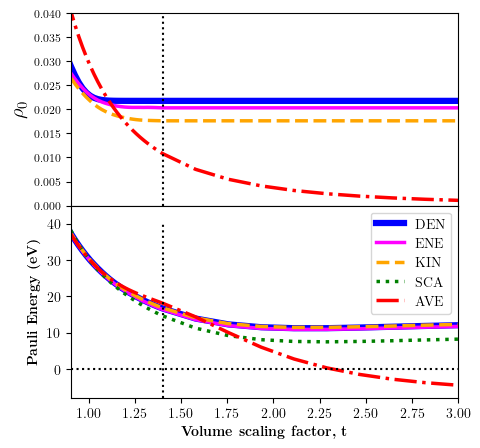

In [43]:
fig, axs = plt.subplots(2,1, figsize=(5,5),sharex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
axs[0].plot(r3, rho0_den3, 'b', linewidth=4.5, label='DEN' )
axs[0].plot(r3, rho0_ene3, color='magenta', linewidth=2.5, label='ENE' )
axs[0].plot(r3, rho0_kin3,'--', color='orange', linewidth=2.5, label='KIN' )
axs[0].plot(r3, np.asarray(rho0_mean[0]),'-.', color='red', linewidth=2.5, label='AVE' )
axs[0].set_xlim(0.9,3)
axs[0].set_ylim(0,0.04)
axs[0].vlines(x=1.4, ymin=0, ymax=0.5, ls='dotted', colors='k')
axs[0].tick_params(axis='both', labelsize=8)
# axs[0].legend()
axs[0].set_ylabel(r'\textbf{$\rho_0$}', fontsize=15)
axs[1].plot(r3, (wt_e_den['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, 'b', linewidth=4.5, label='DEN' )
axs[1].plot(r3, (wt_e_ene['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, color='magenta', linewidth=2.5, label='ENE' )
axs[1].plot(r3, (wt_e_kin['Si_8cd']-vw_e['Si_8cd'])*27.211407/8,'--', color='orange', linewidth=2.5, label='KIN' )
axs[1].plot(r3, (wt_e_sca['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, linestyle='dotted', color='green', linewidth=2.5, label='SCA' )
axs[1].plot(r3, (wt_e_ave['Si_8cd']-vw_e['Si_8cd'])*27.211407/8, '-.', color='red', linewidth=2.5, label='AVE' )
fig.subplots_adjust(hspace=0)
axs[1].set_xlabel(r'\textbf{Volume scaling factor, t}')
axs[1].set_ylabel(r'\textbf{Pauli Energy (eV)}')
axs[1].hlines(y=0,xmin=0.9,xmax=3,ls='dotted',colors='k')
axs[1].vlines(x=1.4, ymin=-8, ymax=40, ls='dotted', colors='k')
axs[1].set_xlim(0.9,3)
axs[1].set_ylim(-8,45)
axs[1].legend()
plt.savefig(path_file+'/EOS/rho0_WT_vW3.png', bbox_inches='tight', dpi=200)
